## PCA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Set up the environment
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline


In [3]:
# Load the data
df = pd.read_csv('wine.csv')

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe(include='all')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


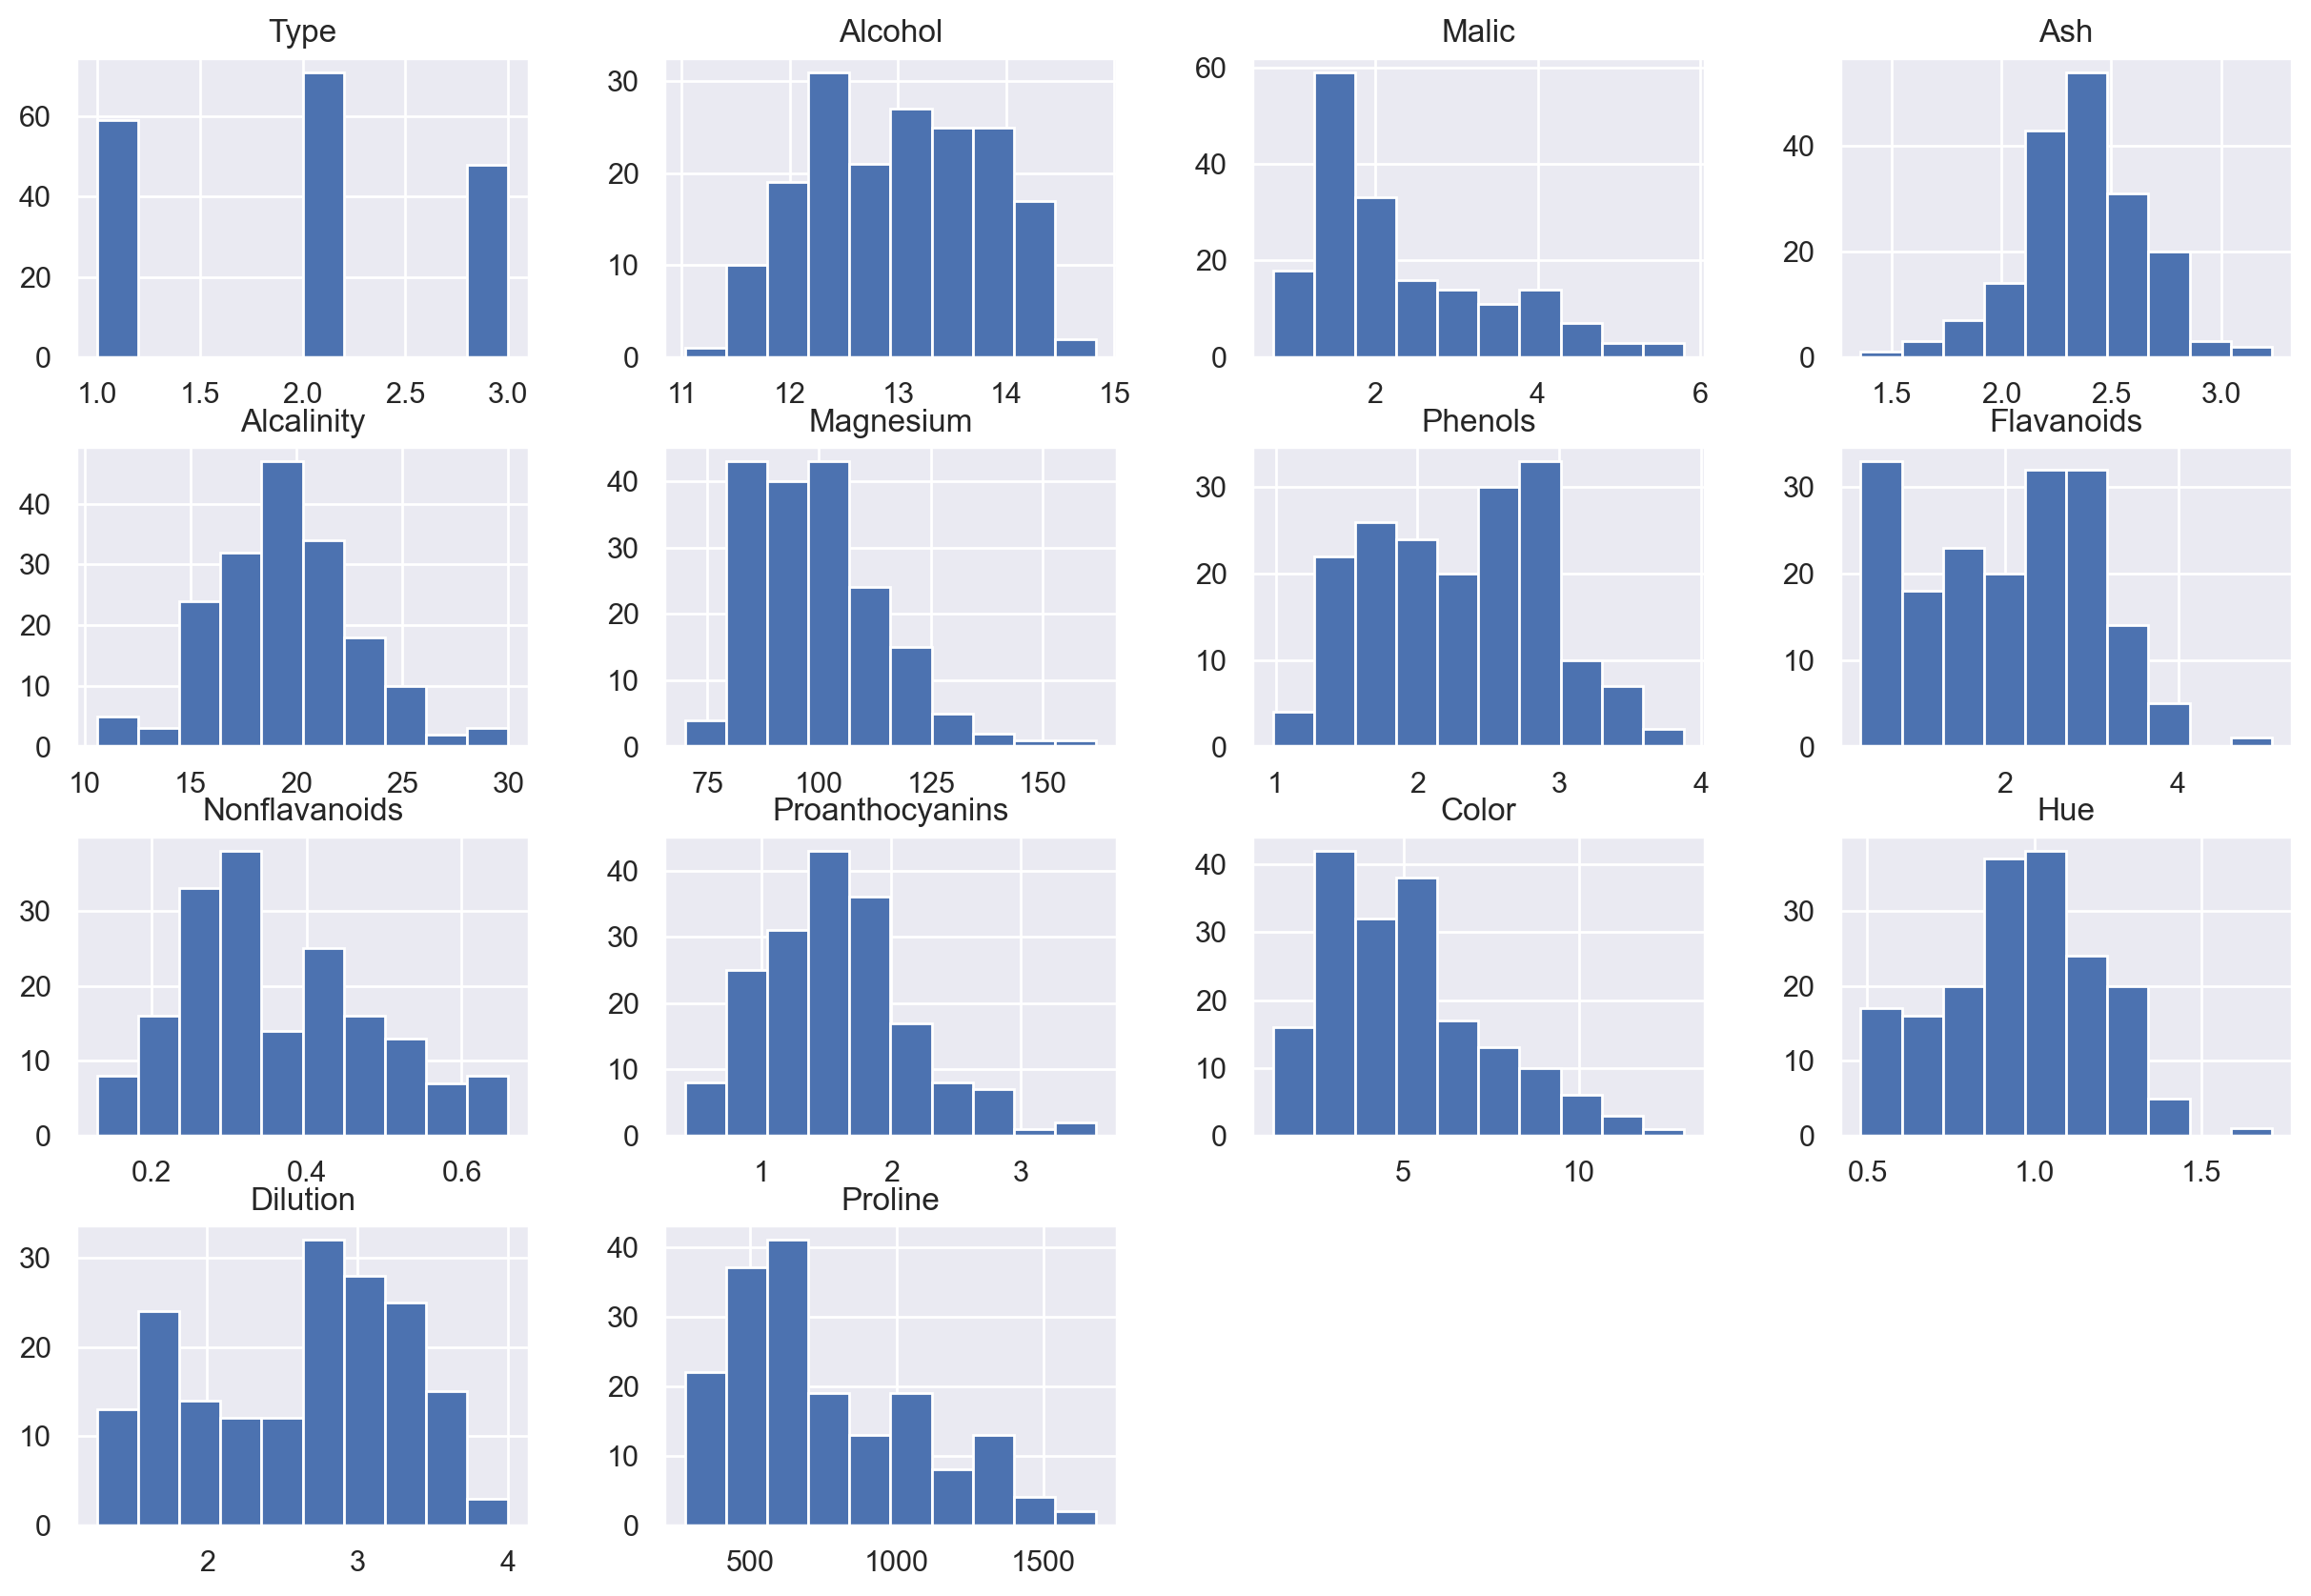

In [7]:
# Data Visualization
df.hist(figsize=(15,10))
plt.show()

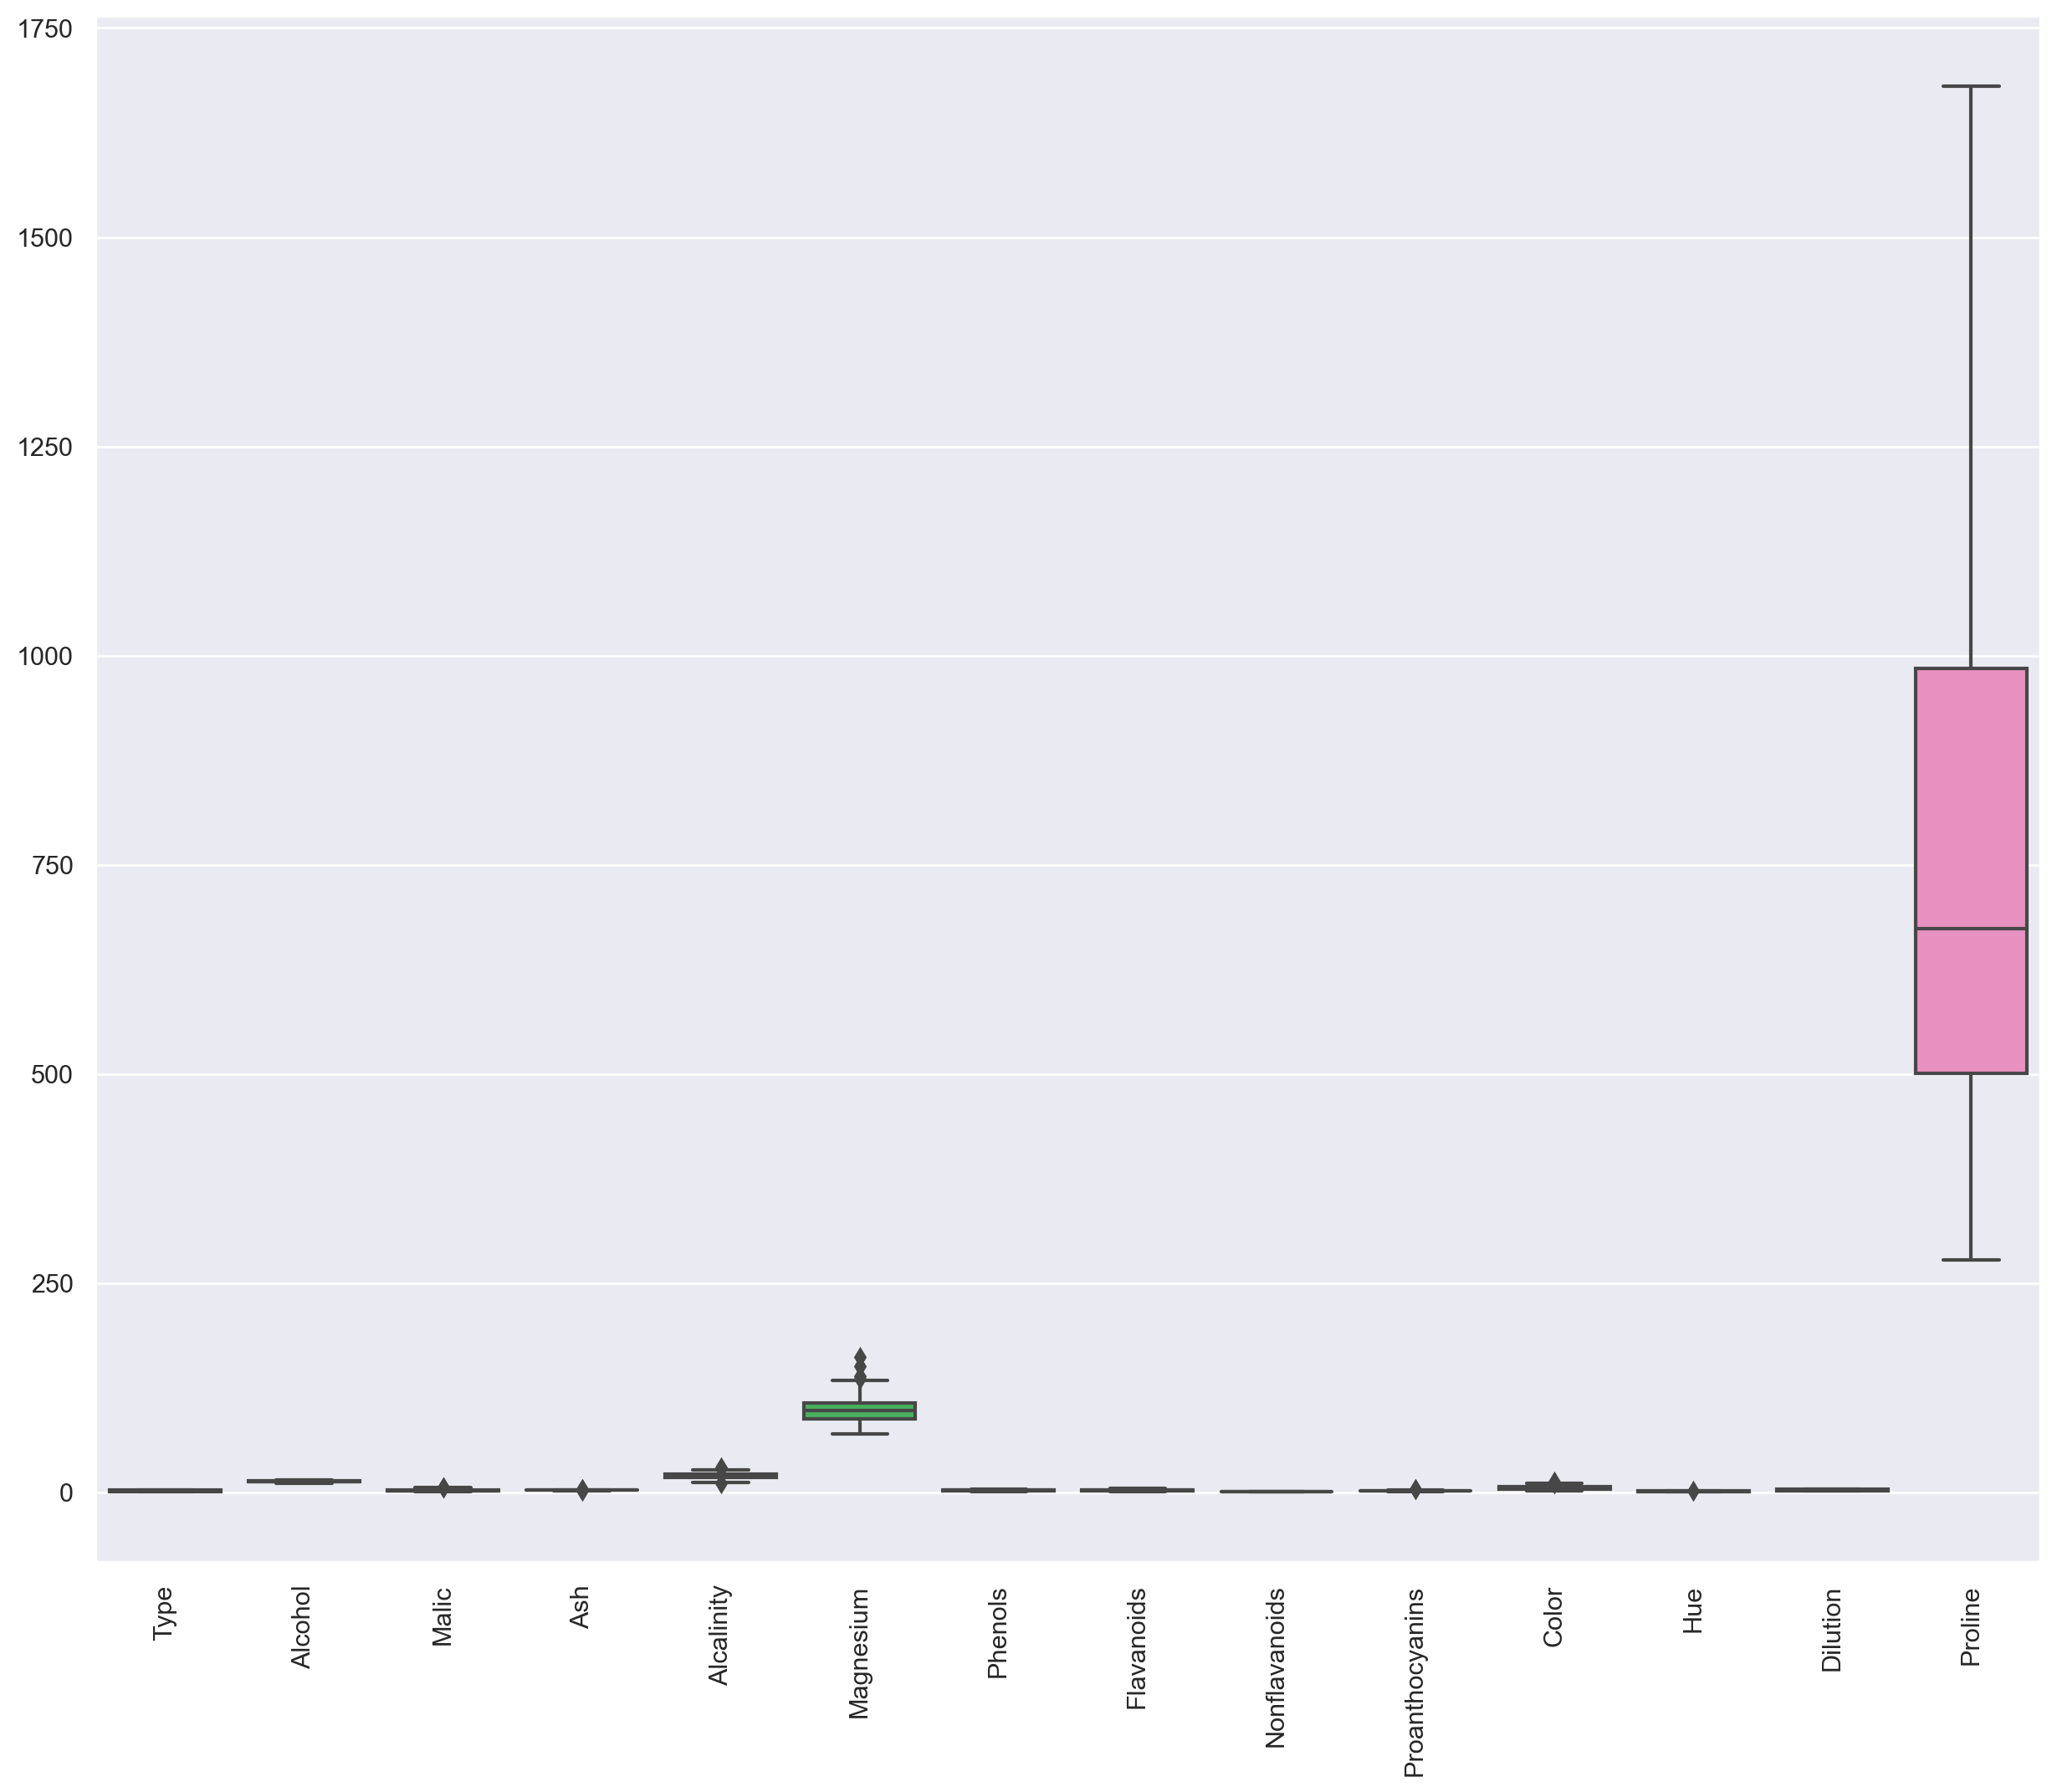

In [8]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df)
plt.xticks(rotation = 90)
plt.show()

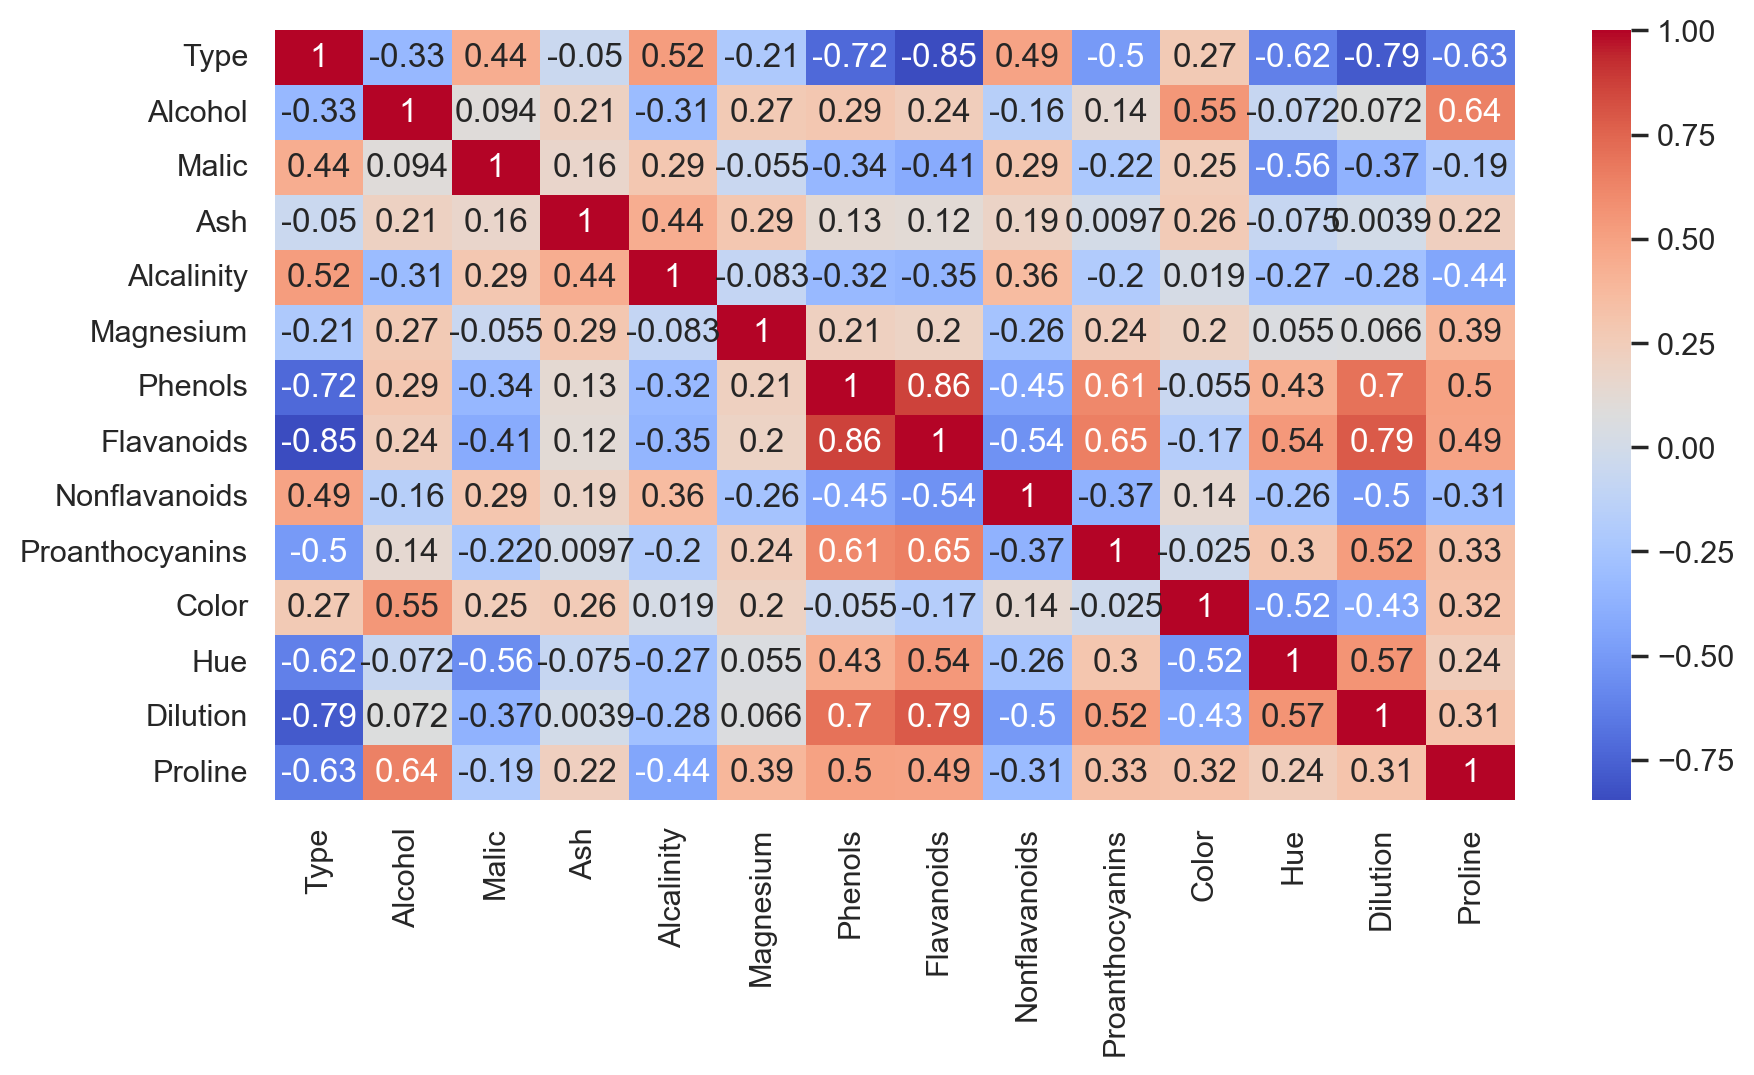

In [9]:
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')
plt.show()

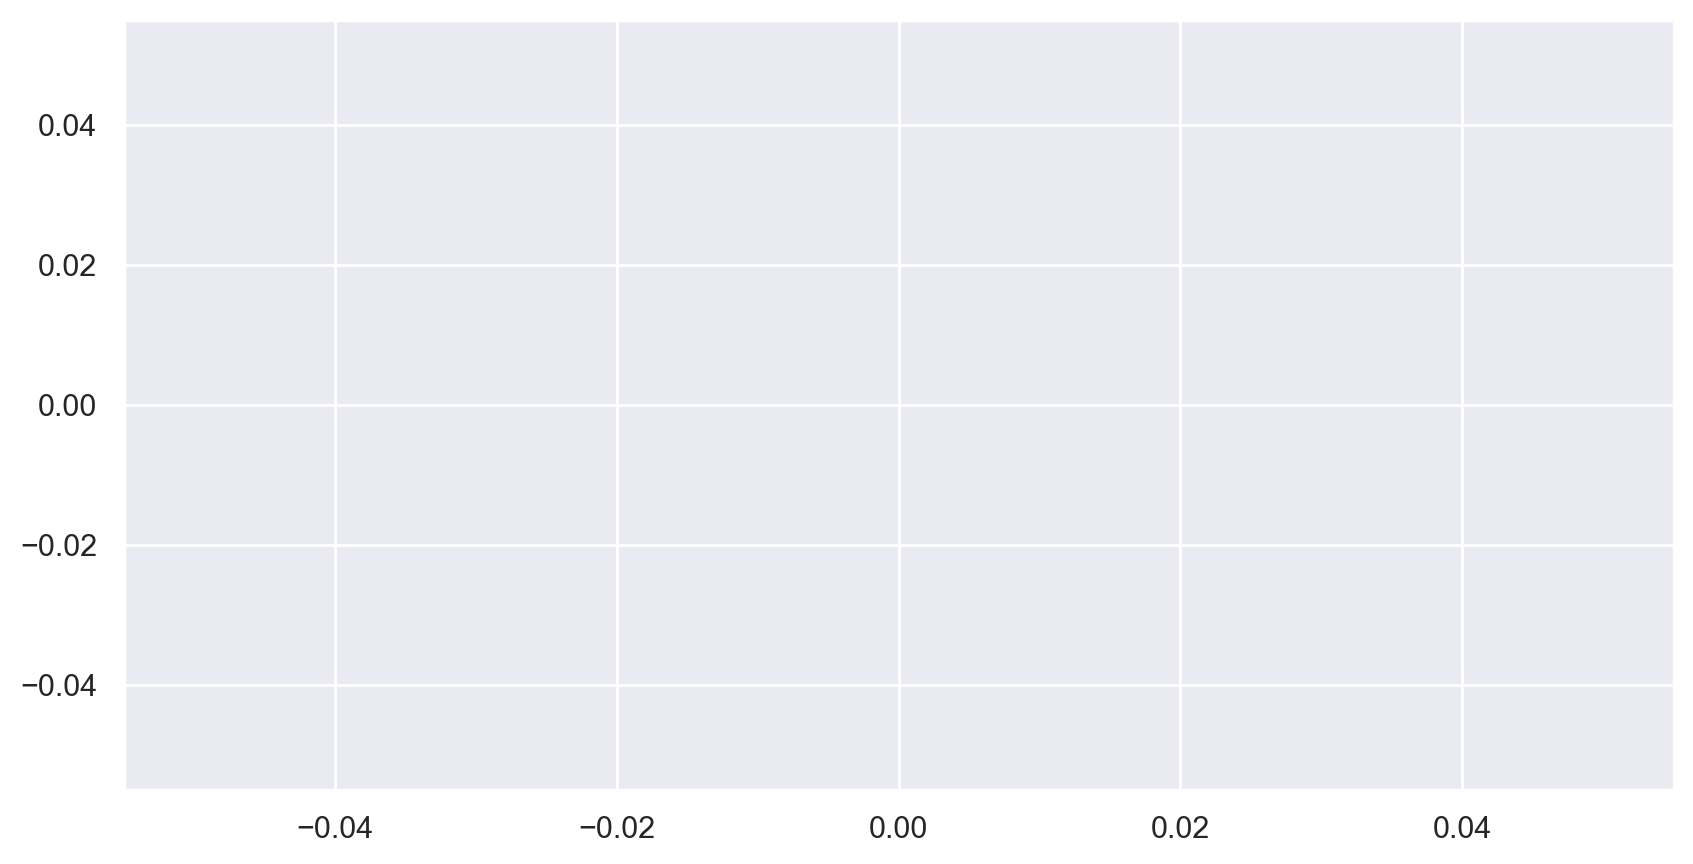

In [10]:
plt.plot(kind = 'density',subplots = True,layout = (4,4),sharex = False,figsize = (15,14))
plt.show()

In [11]:
# Data Preprocessing
x = df.iloc[:, :-1]

In [12]:
y = df['Proline']

In [13]:
Scaled = StandardScaler()

In [14]:
x_Scaled = Scaled.fit_transform(x)

In [15]:
# PCA for Dimensionality Reduction
pca = PCA()

In [16]:
pcs = pca.fit_transform(x_Scaled)

In [17]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

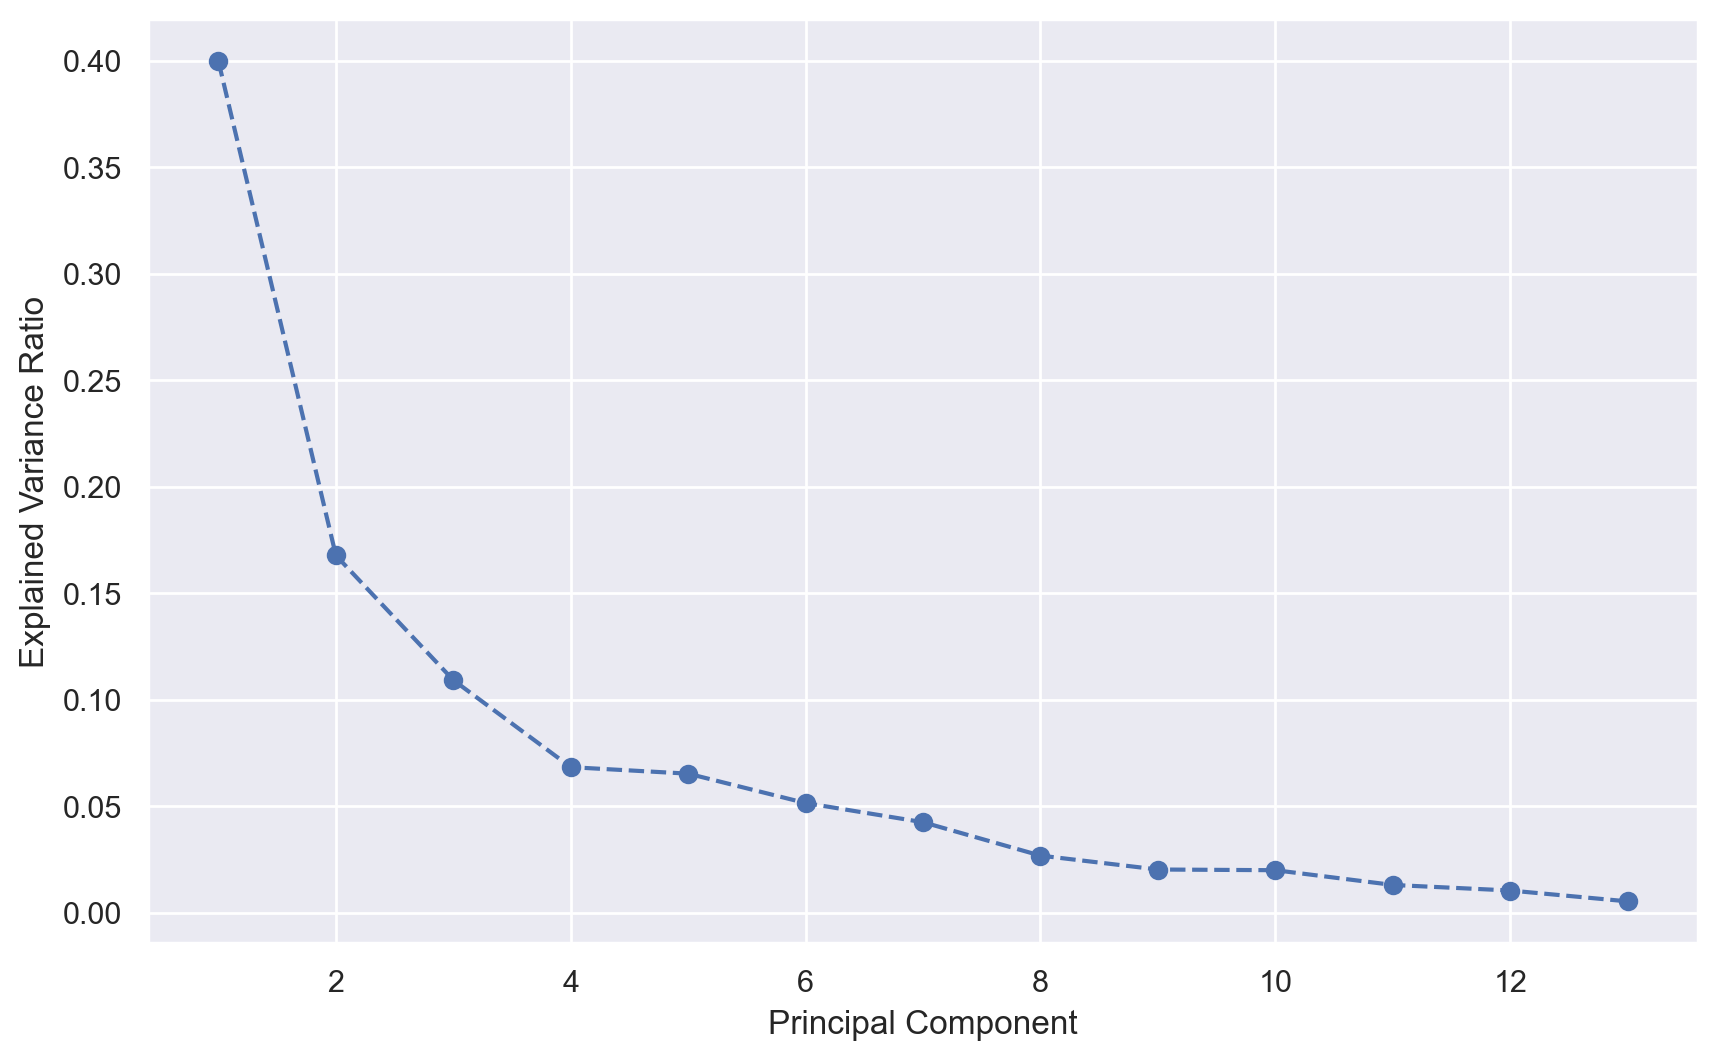

In [18]:
# Scree Plot
plt.figure(figsize=(10,6))
plt.plot(range(1,len(explained_variance) +1), explained_variance,marker = 'o',linestyle = '--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

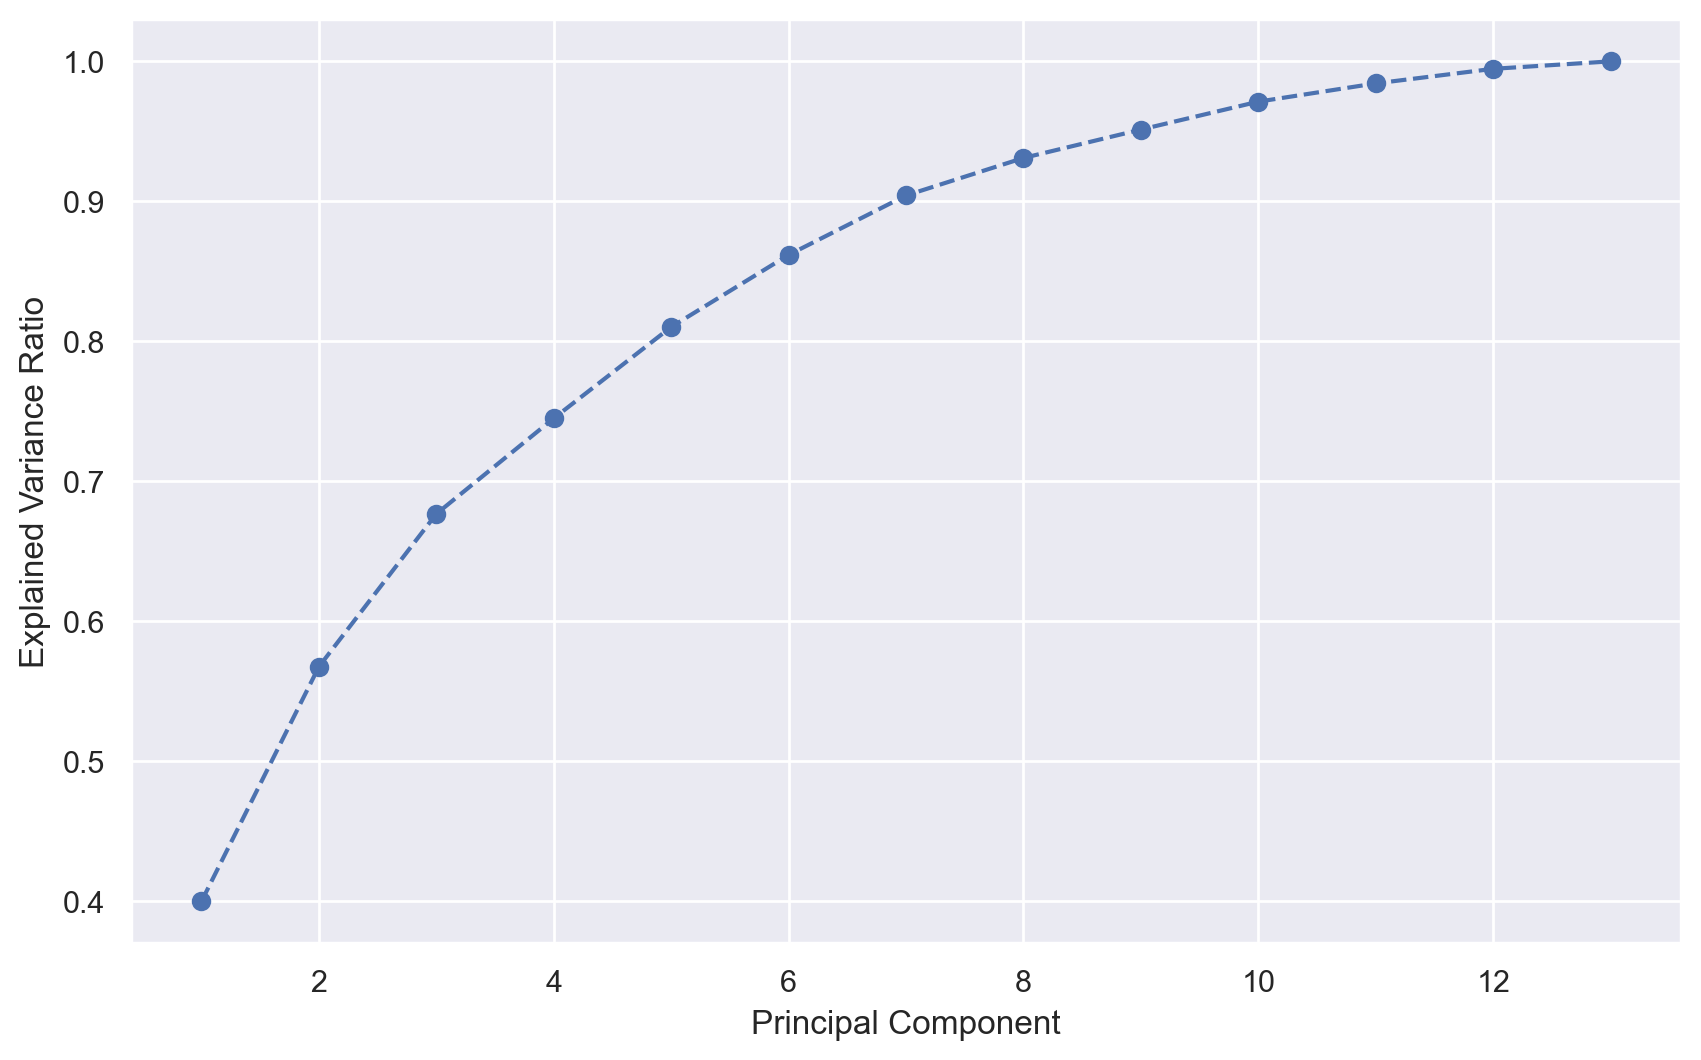

In [19]:
# Cumulative Explained Variance Plot
plt.figure(figsize=(10,6))
plt.plot(range(1,len(explained_variance) +1), cumulative_variance,marker = 'o',linestyle = '--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [20]:
# PCA with 2 Components
pca_2 = PCA(n_components=2)
pcs_2 = pca_2.fit_transform(x_Scaled)

In [21]:
# DataFrame for PCA Components
pca_df = pd.DataFrame(pcs_2,columns = ['PC1','PC2'])
pca_df['Class'] = y

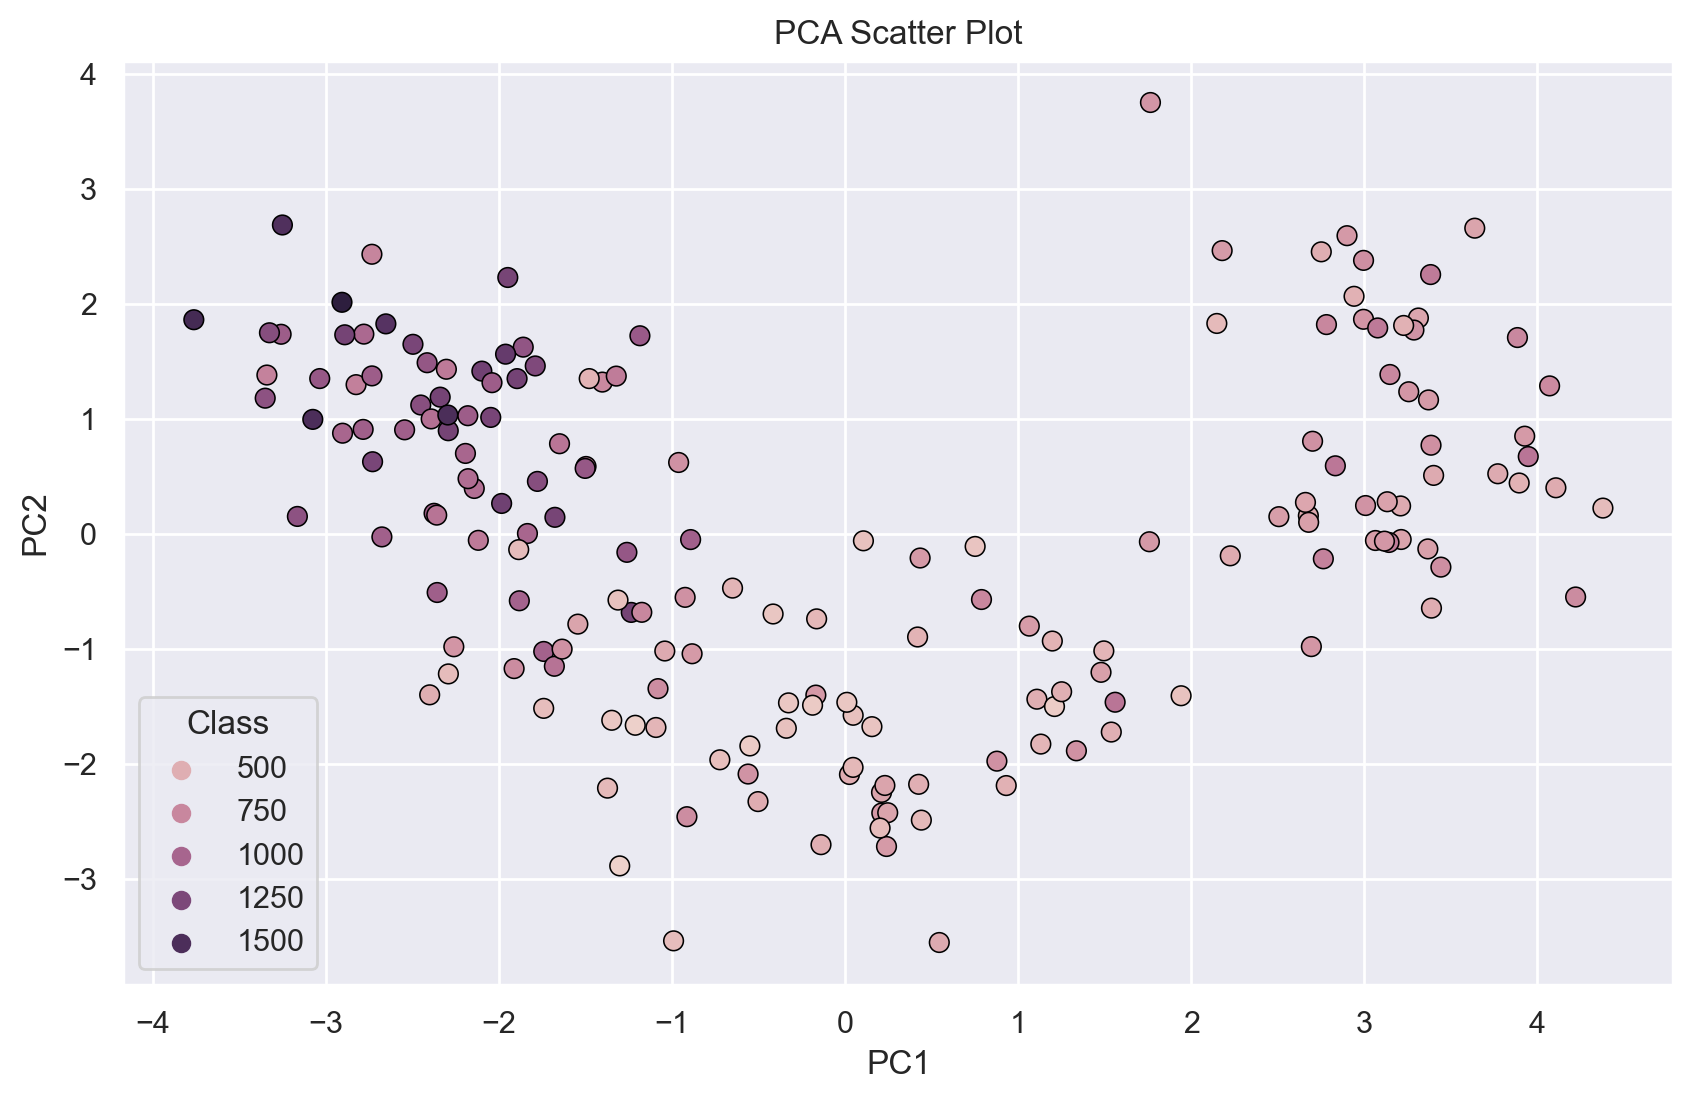

In [22]:
# Scatter Plot of PCA Components
plt.figure(figsize=(10,6))
sns.scatterplot(x= pca_df['PC1'], y = pca_df['PC2'],s = 50, hue= pca_df['Class'], edgecolor = 'black')
plt.title('PCA Scatter Plot')
plt.show()

In [23]:
# Train-Test Split
x_train,y_train,x_test,y_test = train_test_split(pca_df.iloc[:,:-1], pca_df['Class'],random_state=42,test_size=0.2)

In [24]:
# K-Means Clustering
Kmeans = KMeans(n_clusters= 3, random_state=42)
df['Cluster'] = Kmeans.fit_predict(df)

C:\Users\Tejanayak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tejanayak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
# PCA for Clustering Visualization
pca_clusters = PCA(n_components=2)
df_pca_clusters = pca_clusters.fit_transform(df.drop('Cluster', axis=1))
df_pca_clusters = pd.DataFrame(df_pca_clusters, columns=['PC1', 'PC2'])
df_pca_clusters['Cluster'] = df['Cluster']

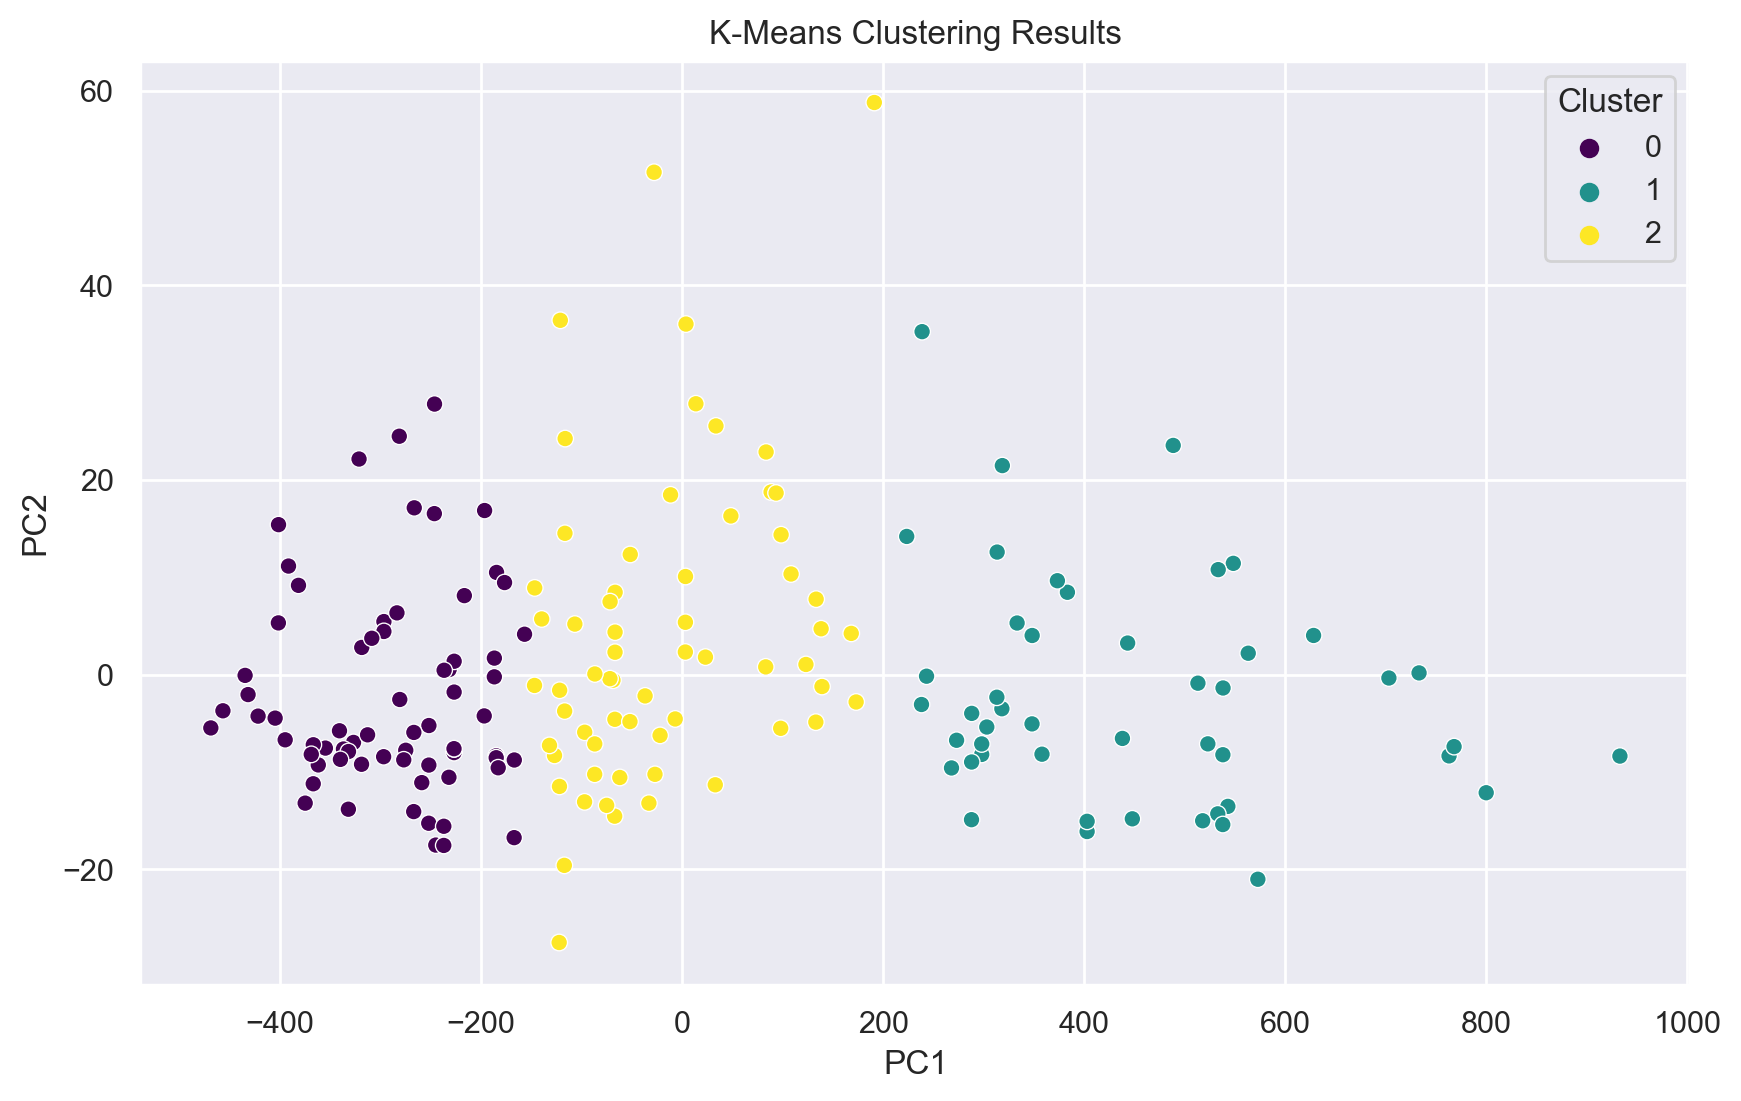

In [26]:
# Scatter Plot of K-Means Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_clusters, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering Results')
plt.show()
     

In [27]:
# Perform Hierarchical Clustering
linked = linkage(pcs_2, method='ward')

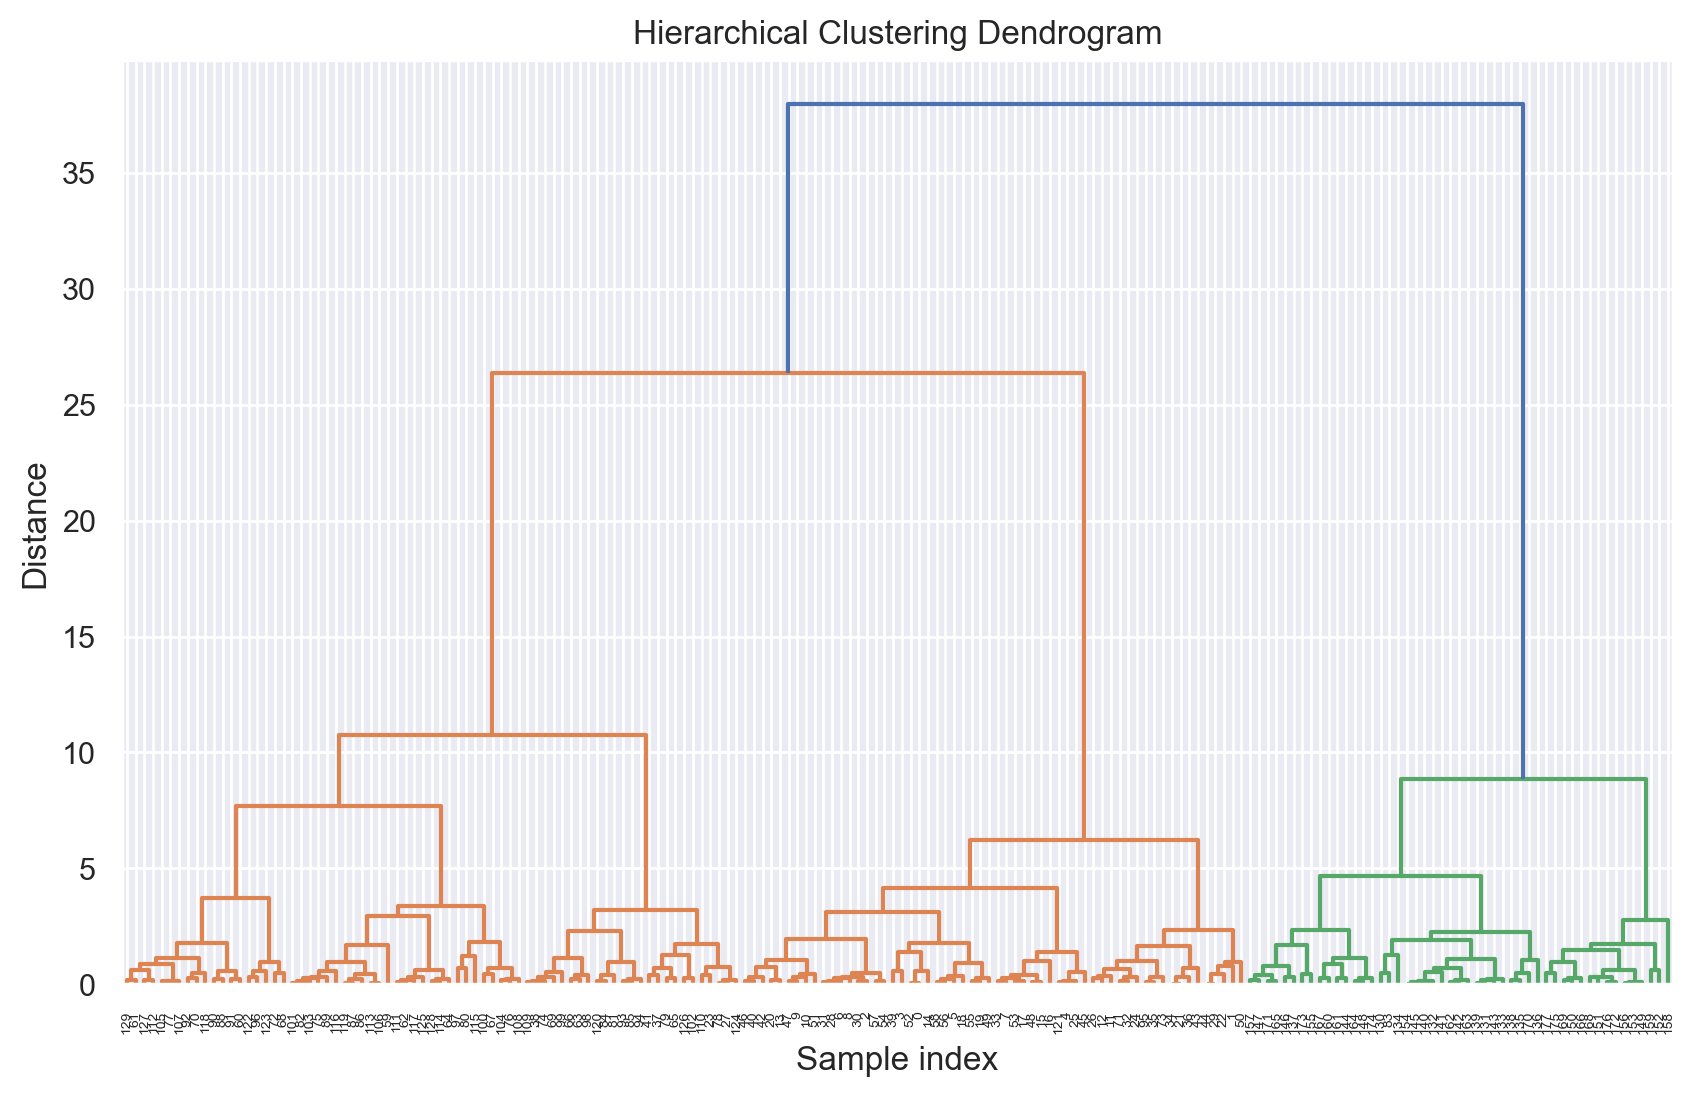

In [28]:
# Plot the Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [29]:
# Cluster Evaluation
sil_score = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
db_index = davies_bouldin_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f'Silhouette Score (Original): {sil_score}')
print(f'Davies–Bouldin Index (Original): {db_index}')
     

Silhouette Score (Original): 0.5711220218931753
Davies–Bouldin Index (Original): 0.5342660703679658


In [30]:
# K-Means on PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans_pca.fit_predict(pca_df.iloc[:, :-1])

C:\Users\Tejanayak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tejanayak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


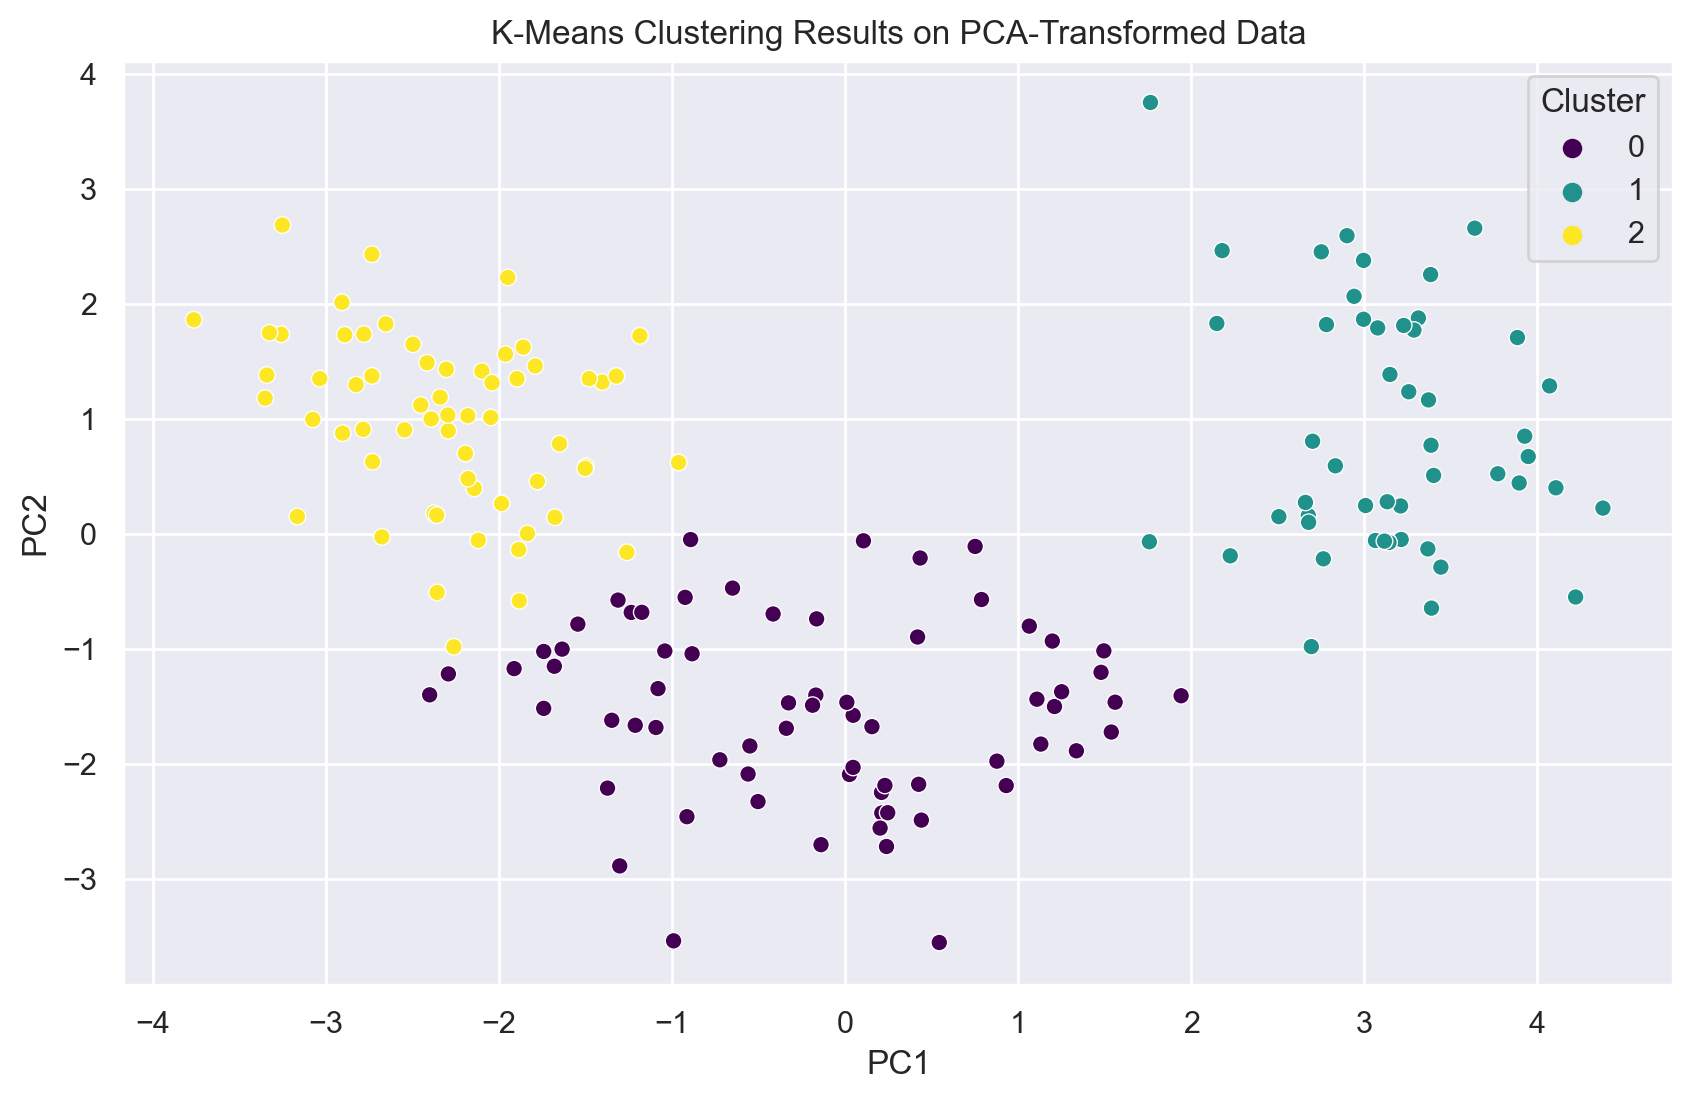

In [31]:
# Scatter Plot of K-Means Clustering on PCA-Transformed Data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering Results on PCA-Transformed Data')
plt.show()

In [32]:
# PCA Cluster Evaluation
sil_score_pca = silhouette_score(pca_df.drop('Cluster', axis=1), pca_df['Cluster'])
db_index_pca = davies_bouldin_score(pca_df.drop('Cluster', axis=1), pca_df['Cluster'])
print(f'Silhouette Score (PCA): {sil_score_pca}')
print(f'Davies–Bouldin Index (PCA): {db_index_pca}')

Silhouette Score (PCA): 0.15467801863633193
Davies–Bouldin Index (PCA): 1.870063548428182


In [33]:
# Summary of Results
print(f'Silhouette Score (Original): {sil_score}')
print(f'Davies–Bouldin Index (Original): {db_index}')
print(f'Silhouette Score (PCA): {sil_score_pca}')
print(f'Davies–Bouldin Index (PCA): {db_index_pca}')


Silhouette Score (Original): 0.5711220218931753
Davies–Bouldin Index (Original): 0.5342660703679658
Silhouette Score (PCA): 0.15467801863633193
Davies–Bouldin Index (PCA): 1.870063548428182


### conclusion :


The analysis using PCA and Hierarchical Clustering on the WINE dataset shows that:



- PCA reduced the dimensionality of the dataset while retaining most of the variance, allowing for effective visualization.
- The dendrogram from hierarchical clustering provided insights into the natural groupings of the data.
- The silhouette score and Davies–Bouldin index for the hierarchical clustering indicate that the clusters formed are not as well-defined as in the original dataset, suggesting that more tuning or alternative methods might be needed for optimal clustering.